In [1]:
from csv import reader
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from scipy.stats import uniform, randint

rental = np.array([221, 342, 568, 216, 316, 210, 340, 326, 106, 259,
                   302, 639, 540, 341, 212, 222, 336, 116, 124, 385,
                   247, 162, 329, 118, 128, 346, 907, 144, 529, 501
                  ])

features = ['년',
           '월', 
           '시', 
           '기온(°C)',
           '강수량(mm)', 
           '풍속(m/s)', 
           '습도(%)', 
           '적설(cm)',
           '요일_0', 
           '요일_1', 
           '요일_2', 
           '요일_3',
           '요일_4', 
           '요일_5', 
           '요일_6',]

try:
    t = pd.read_pickle('data/pickle/data_10_20178.pkl')
    t1 = pd.read_pickle('data/pickle/data_10_20178반납.pkl')
except:
    
    df1 = pd.DataFrame(pd.read_csv("data/database/201801.csv"))
    df2 = pd.DataFrame(pd.read_csv("data/database/201802.csv"))
    df3 = pd.DataFrame(pd.read_csv("data/database/201803.csv"))
    df4 = pd.DataFrame(pd.read_csv("data/database/201804.csv"))
    df5 = pd.DataFrame(pd.read_csv("data/database/201805.csv"))
    df6_1 = pd.DataFrame(pd.read_csv("data/database/201806_01.csv"))
    df6_2 = pd.DataFrame(pd.read_csv("data/database/201806_02.csv"))
    df6 = pd.concat([df6_1, df6_2])
    df7_1 = pd.DataFrame(pd.read_csv("data/database/201807_01.csv"))
    df7_2 = pd.DataFrame(pd.read_csv("data/database/201807_02.csv"))
    df7 = pd.concat([df7_1, df7_2])
    df8 = pd.DataFrame(pd.read_csv("data/database/201808.csv"))
    df9_1 = pd.DataFrame(pd.read_csv("data/database/201809_1.csv"))
    df9_2 = pd.DataFrame(pd.read_csv("data/database/201809_2.csv"))
    df9 = pd.concat([df9_1, df9_2])
    df10_1 = pd.DataFrame(pd.read_csv("data/database/201810_01.csv"))
    df10_2 = pd.DataFrame(pd.read_csv("data/database/201810_02.csv"))
    df10 = pd.concat([df10_1, df10_2])
    df11 = pd.DataFrame(pd.read_csv("data/database/201811.csv"))
    df12 = pd.DataFrame(pd.read_csv("data/database/201812.csv"))


    df2017_1 = pd.DataFrame(pd.read_csv("data/database/201701.csv"))
    df2017_2 = pd.DataFrame(pd.read_csv("data/database/201702.csv"))
    df2017_3 = pd.DataFrame(pd.read_csv("data/database/201703.csv"))
    df2017_4 = pd.DataFrame(pd.read_csv("data/database/201704.csv"))
    df2017_5 = pd.DataFrame(pd.read_csv("data/database/201705.csv"))
    df2017_6 = pd.DataFrame(pd.read_csv("data/database/201706.csv"))
    df2017_7 = pd.DataFrame(pd.read_csv("data/database/201707.csv"))
    df2017_8 = pd.DataFrame(pd.read_csv("data/database/201708.csv"))
    df2017_9 = pd.DataFrame(pd.read_csv("data/database/201709.csv"))
    df2017_10 = pd.DataFrame(pd.read_csv("data/database/201710.csv"))
    df2017_11 = pd.DataFrame(pd.read_csv("data/database/201711.csv"))
    df2017_12 = pd.DataFrame(pd.read_csv("data/database/201712.csv"))

    df = [[df2017_1, df2017_2, df2017_3, df2017_4, df2017_5, df2017_6, df2017_7, df2017_8, df2017_9, df2017_10, df2017_11, df2017_12],[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]]
    
    def load_2019_df(rental_no, w , df2019_1, df2019_2, df2019_3):
        wt = load_weather_month(w, 1)
        datat, baset = calculate_date(df2019_1)
        temp = concat_columns(datat, wt, baset, rental_no)

        wt1 = load_weather_month(w, 2)
        datat1, baset1 = calculate_date(df2019_2)
        temp1 = concat_columns(datat1, wt1, baset1, rental_no)

        wt3 = load_weather_month(w, 3)
        datat2, baset2 = calculate_date(df2019_3)
        temp2 = concat_columns(datat2, wt3, baset2, rental_no)
    
        result = pd.concat([temp, temp1, temp2])
        return result
        
    def load_2019():
        df2019_1 = pd.DataFrame(pd.read_csv("data/database/201901.csv"))
        df2019_2 = pd.DataFrame(pd.read_csv("data/database/201902.csv"))
        df2019_3 = pd.DataFrame(pd.read_csv("data/database/201903.csv"))
        weather = pd.read_csv("data/database/2019weather.csv")
        dfw1 = pd.DataFrame(weather)
        dfw1['일시'] = pd.to_datetime(dfw1['일시'], errors='coerce')
        dfw1['월'] = dfw1['일시'].dt.month
        dfw1['일'] = dfw1['일시'].dt.day
        dfw1['시'] = dfw1['일시'].dt.hour
        
        t1 = load_2019_df(221, dfw1, df2019_1, df2019_2, df2019_3)
        t2 = load_2019_df(342, dfw1, df2019_1, df2019_2, df2019_3)
        t3 = load_2019_df(568, dfw1, df2019_1, df2019_2, df2019_3)
        t4 = load_2019_df(216, dfw1, df2019_1, df2019_2, df2019_3)
        t5 = load_2019_df(316, dfw1, df2019_1, df2019_2, df2019_3)
        t6 = load_2019_df(210, dfw1, df2019_1, df2019_2, df2019_3)
        t7 = load_2019_df(340, dfw1, df2019_1, df2019_2, df2019_3)
        t8 = load_2019_df(326, dfw1, df2019_1, df2019_2, df2019_3)
        t9 = load_2019_df(106, dfw1, df2019_1, df2019_2, df2019_3)
        t10 = load_2019_df(259, dfw1, df2019_1, df2019_2, df2019_3)
        
        t11 = load_2019_df(302, dfw1, df2019_1, df2019_2, df2019_3)
        t12 = load_2019_df(639, dfw1, df2019_1, df2019_2, df2019_3)
        t13 = load_2019_df(540, dfw1, df2019_1, df2019_2, df2019_3)
        t14 = load_2019_df(341, dfw1, df2019_1, df2019_2, df2019_3)
        t15 = load_2019_df(212, dfw1, df2019_1, df2019_2, df2019_3)
        t16 = load_2019_df(222, dfw1, df2019_1, df2019_2, df2019_3)
        t17 = load_2019_df(336, dfw1, df2019_1, df2019_2, df2019_3)
        t18 = load_2019_df(116, dfw1, df2019_1, df2019_2, df2019_3)
        t19 = load_2019_df(124, dfw1, df2019_1, df2019_2, df2019_3)
        t20 = load_2019_df(385, dfw1, df2019_1, df2019_2, df2019_3)
        
        t21 = load_2019_df(247, dfw1, df2019_1, df2019_2, df2019_3)
        t22 = load_2019_df(162, dfw1, df2019_1, df2019_2, df2019_3)
        t23 = load_2019_df(329, dfw1, df2019_1, df2019_2, df2019_3)
        t24 = load_2019_df(118, dfw1, df2019_1, df2019_2, df2019_3)
        t25 = load_2019_df(128, dfw1, df2019_1, df2019_2, df2019_3)
        t26 = load_2019_df(346, dfw1, df2019_1, df2019_2, df2019_3)
        t27 = load_2019_df(907, dfw1, df2019_1, df2019_2, df2019_3)
        t28 = load_2019_df(144, dfw1, df2019_1, df2019_2, df2019_3)
        t29 = load_2019_df(529, dfw1, df2019_1, df2019_2, df2019_3)
        t30 = load_2019_df(501, dfw1, df2019_1, df2019_2, df2019_3)


        
        
        t= pd.concat([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,
                     t21, t22, t23, t24, t25, t26, t27, t28, t29, t30]).reset_index(drop=True)
        
    
        return t  
    
    def load_weather():
        weather = pd.read_csv("data/database/2017weather.csv")
        dfw1 = pd.DataFrame(weather)
        dfw1['일시'] = pd.to_datetime(dfw1['일시'], errors='coerce')
        dfw1['월'] = dfw1['일시'].dt.month
        dfw1['일'] = dfw1['일시'].dt.day
        dfw1['시'] = dfw1['일시'].dt.hour
        weather1 = pd.read_csv("data/database/2018weather.csv")
        dfw2 = pd.DataFrame(weather1)
        dfw2['일시'] = pd.to_datetime(dfw2['일시'], errors='coerce')
        dfw2['월'] = dfw2['일시'].dt.month
        dfw2['일'] = dfw2['일시'].dt.day
        dfw2['시'] = dfw2['일시'].dt.hour
        dfw = [dfw1, dfw2]
        return dfw

    dfw = load_weather()

    def load_weather_month(weather, mon):
        weather1 = weather[weather['월'] == mon]
        weather1 = weather1.drop(['일시','월'], 1).reset_index(drop=True)
        return weather1

    def calculate_date(df):
        dft = df
        dft['대여시간'] = pd.to_datetime(dft['대여시간'], errors='coerce')
        dft['년'] = dft['대여시간'].dt.year - 2010
        dft['요일'] = dft['대여시간'].dt.weekday
        dft['월'] = dft['대여시간'].dt.month
        dft['일'] = dft['대여시간'].dt.day
        dft['시'] = dft['대여시간'].dt.hour
        base = pd.DataFrame(dft.drop_duplicates(['일','시'])).reset_index(drop=True)
        dftemp = df[df['대여장소'].isin(rental)]
        return dftemp, base

    def concat_columns(dftemp, dfw, base, rental_no):
        temp1 = base
        dftemp113 = dftemp[dftemp['대여장소'] == rental_no]
        #print(pd.crosstab(dftemp113['일'], dftemp113['시'], margins=False))
        fre = pd.crosstab(dftemp113['일'], dftemp113['시'], margins=False).values.flatten()
        frelist = fre.tolist()

        for i in range(int(dfw.shape[0]/24)):
            if((dftemp113[dftemp113['일'] == (i+1)]).shape[0]==0):
                for x in range(24):
                    frelist.insert((i*24)+x ,0)

        for i in range(24):
            if((dftemp113[dftemp113['시'] == i]).shape[0]==0):
                for x in range(int(dfw.shape[0]/24)):
                    frelist.insert((i+(x*24)),0)

        fre = np.array(frelist)                        
        fre = pd.DataFrame(fre, columns=['건수'])
        temp1['대여장소'] = rental_no
        temp1['빈도수'] = fre['건수']
        temp1 = temp1.drop(['대여시간', '반납시간', '반납장소'], 1)
        temp1 = pd.merge(temp1, dfw, on=['일', '시'])
        temp1 = temp1.drop(['일'], 1)
        return temp1

    def data_no(rental_no):
        dfwlist = []
        data = [0 for _ in range(12)]
        base = [0 for _ in range(12)]
        temp = [0 for _ in range(12)]
        r = pd.DataFrame()
        for x in range(len(dfw)):
            for i in range(12):
                dfwlist.append(load_weather_month(dfw[x], i+1))

            for i in range(12):
                data[i], base[i] = calculate_date(df[x][i])

            for i in range(12):
                temp[i] = concat_columns(data[i], dfwlist[12*x+i], base[i], rental_no)

            result = pd.concat([temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7],temp[8],temp[9],temp[10],temp[11]]).reset_index(drop=True)
            r = pd.concat([r, result])

        return r.reset_index(drop=True)
    
    t2019 = load_2019()
    

    t1 = data_no(221)
    t2 = data_no(342)
    t3 = data_no(568)
    t4 = data_no(216)
    t5 = data_no(316)
    t6 = data_no(210)
    t7 = data_no(340)
    t8 = data_no(326)
    t9 = data_no(106)
    t10 = data_no(259)
    
    t11 = data_no(302)
    t12 = data_no(639)
    t13 = data_no(540)
    t14 = data_no(341)
    t15 = data_no(212)
    t16 = data_no(222)
    t17 = data_no(336)
    t18 = data_no(116)
    t19 = data_no(124)
    t20 = data_no(385)
    
    t21 = data_no(247)
    t22 = data_no(162)
    t23 = data_no(329)
    t24 = data_no(118)
    t25 = data_no(128)
    t26 = data_no(346)
    t27 = data_no(907)
    t28 = data_no(144)
    t29 = data_no(529)
    t30 = data_no(501)

    
    t= pd.concat([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20, t21, t22, t23, t24, t25, t26, t27, t28, t29, t30]).reset_index(drop=True)
    t = pd.concat([t,t2019]).reset_index(drop=True)

    t = t.join(pd.get_dummies(t['요일'], prefix="요일"))
    t.to_pickle('data/pickle/테스트8번.pkl')

ts = pd.read_pickle('data/pickle/테스트8번.pkl')    
tr = pd.read_pickle('data/pickle/data_10_20178반납_30.pkl')
 
print(ts)




        대여장소  년  요일  월   시  빈도수  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  \
0        221  7   6  1   0    0     0.2      0.0      2.2     79     0.0   
1        221  7   6  1   1    0     0.0      0.0      1.4     78     0.0   
2        221  7   6  1   2    0    -0.3      0.0      1.9     81     0.0   
3        221  7   6  1   3    0    -0.7      0.0      2.0     84     0.0   
4        221  7   6  1   4    0    -1.1      0.0      1.6     85     0.0   
5        221  7   6  1   5    2    -1.4      0.0      1.4     86     0.0   
6        221  7   6  1   6    1    -1.5      0.0      1.6     87     0.0   
7        221  7   6  1   7    0    -1.5      0.0      1.4     87     0.0   
8        221  7   6  1   8    2    -1.3      0.0      1.4     87     0.0   
9        221  7   6  1   9    0    -0.4      0.0      1.6     83     0.0   
10       221  7   6  1  10    1     0.8      0.0      2.1     77     0.0   
11       221  7   6  1  11    0     2.5      0.0      1.9     71     0.0   
12       221

In [12]:
import xgboost as xgb
t207s = t[t['대여장소']==207]
n = 3
results = {} 
total = t['대여장소'].nunique()  # 서로다른 대기소 갯수 30개
# print(total)  # 10
for idx, (name, _df) in enumerate(t207s.groupby('대여장소'), 1):
    print()
    print("[%d/%d] %d번 대여소" %(idx, total, name), end=' ')  #name은 대여소 코드.
    print()
      
    x_train, x_test, y_train, y_test = train_test_split(_df[features], _df['빈도수'], test_size=0.2, random_state=15) 
    
    param_grid = { 
        "gamma": uniform(0, 0.5).rvs(n), 
        "max_depth": range(2, 7), # default 3 
        "n_estimators": randint(100, 150).rvs(n), # default 100 
    } 
        
        
    grid = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), cv=5, n_jobs=-1, param_grid=param_grid, verbose=1) 
        
    grid = grid.fit(x_train, y_train) 
        
        
    model = grid.best_estimator_
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
        
    model.save_model("data/model/수요" + str(int(name)) + ".model")
        
    for i in range(0, 50):
        print('>predicted=' +str(predictions[i]) + ', actual=' + str(y_test.values[i]))
    print(x_test)
            
    results[name] = {}
    results[name]['model'] = model  #best_estimator 저장
    results[name]['mae'] = mae
    print(mae)
    results[name]['errors'] = predictions - y_test  


errors = np.array([result['mae'] for result in results.values()])
errors.mean()


[1/10] 207번 대여소 
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  2.0min finished
C:\Users\jaehu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


>predicted=-0.15193927, actual=0
>predicted=0.486967, actual=0
>predicted=0.24288553, actual=0
>predicted=0.077717334, actual=0
>predicted=5.526597, actual=1
>predicted=10.746972, actual=7
>predicted=2.8275478, actual=6
>predicted=4.7121315, actual=6
>predicted=1.3775771, actual=1
>predicted=0.644475, actual=0
>predicted=1.0271542, actual=0
>predicted=-0.51313186, actual=0
>predicted=0.73437834, actual=2
>predicted=-0.1939215, actual=0
>predicted=4.625626, actual=6
>predicted=6.8114, actual=2
>predicted=12.562403, actual=7
>predicted=21.718367, actual=50
>predicted=6.9668407, actual=7
>predicted=15.970363, actual=22
>predicted=5.807782, actual=4
>predicted=0.58243513, actual=1
>predicted=1.9753544, actual=6
>predicted=4.6932354, actual=1
>predicted=0.49051416, actual=3
>predicted=4.9484243, actual=3
>predicted=9.392197, actual=14
>predicted=1.1813684, actual=1
>predicted=2.945114, actual=0
>predicted=2.831711, actual=1
>predicted=23.062223, actual=41
>predicted=2.9292712, actual=8
>pre

3.3139918239984087

In [25]:
from csv import reader
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from xgboost import Booster


features = ['년','월', '시', 
           '기온(°C)','강수량(mm)', '풍속(m/s)', 
           '습도(%)', '적설(cm)','요일_0', '요일_1', 
           '요일_2', '요일_3','요일_4', '요일_5', '요일_6',]

out = pd.DataFrame(pd.read_csv("data/api/out.csv"))
out['date'] = pd.to_datetime(out['date'], errors='coerce')
out['년'] = out['date'].dt.year - 2010
out['월'] = out['date'].dt.month
out['시'] = out['date'].dt.hour
out['요일'] = out['date'].dt.weekday
#out['대여장소'] = out['number']
#out['반납장소'] = out['number']
out['기온(°C)'] = out['temperature']
out['강수량(mm)'] = out['rain']
out['풍속(m/s)'] = out['wind']
out['습도(%)'] = out['humidity']
out['적설(cm)'] = out['snow']
#out = out.join(pd.get_dummies(out['요일'], prefix="요일"))

out['요일_0'] = 0
out['요일_1'] = 0
out['요일_2'] = 0
out['요일_3'] = 0
out['요일_4'] = 0
out['요일_5'] = 0
out['요일_6'] = 0
for i in range(out.shape[0]):    
    if out.loc[i, '요일'] == 0:
        out.loc[i, '요일_0'] = 1
    if out.loc[i, '요일'] == 1:
        out.loc[i, '요일_1'] = 1
    if out.loc[i, '요일'] == 2:
        out.loc[i, '요일_2'] = 1
    if out.loc[i, '요일'] == 3:
        out.loc[i, '요일_3'] = 1
    if out.loc[i, '요일'] == 4:
        out.loc[i, '요일_4'] = 1
    if out.loc[i, '요일'] == 5:
        out.loc[i, '요일_5'] = 1
    if out.loc[i, '요일'] == 6:
        out.loc[i, '요일_6'] = 1

#대여소번호 지정
location = out['number'].values        
        
out = out.drop(['number','date', 'temperature', 'rain', 'wind', 'humidity', 'snow', '요일'], 1)

print(out)
# 30개 
rental = np.array([221, 342, 568, 216, 316,
                   210, 340, 326, 106, 259,
                   302, 639, 540, 341, 212,
                   222, 336, 116, 124, 385,
                   247, 162, 329, 118, 128,
                   346, 907, 144, 529, 501])

# 10개. 고빈도
rental = np.array([207, 502, 113, 2102, 1210, 
                   152, 1308, 2219, 1906, 907])

# 저장된 모델 로드해서 테스트


loaded_model = xgb.Booster()
loaded_modelr = xgb.Booster()
# 수요106 모델 로드
loaded_model.load_model("data/model/수요" + str(int(location)) + ".model")
loaded_modelr.load_model("data/model/공급" + str(int(location)) + ".model")

dtest = xgb.DMatrix(out)

#수요
predictions = loaded_model.predict(dtest)
#공급
predictionsr = loaded_modelr.predict(dtest)

prediction = predictionsr-predictions
print(prediction)


   년  월  시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  요일_0  요일_1  요일_2  요일_3  \
0  7  3  5     1.9        0      0.6     75       0     0     0     0     0   

   요일_4  요일_5  요일_6  
0     1     0     0  
[0.03754175]


In [10]:
import xgboost as xgb
location = 207
t = pd.read_pickle('data/pickle/data_10_20178.pkl')
t1 = pd.read_pickle('data/pickle/data_10_20178반납.pkl')
ts106 = t[t['대여장소'] == location]
x_trains, x_tests, y_trains, y_tests = train_test_split(ts106[features], ts106['빈도수'], test_size=0., random_state=15)

tr106 = t1[t1['반납장소'] == location]
x_trainr, x_testr, y_trainr, y_testr = train_test_split(tr106[features], tr106['빈도수'], test_size=0.2, random_state=15)

loaded_model = xgb.Booster()
loaded_modelr = xgb.Booster()

loaded_model.load_model("data/model/수요" + str(int(location)) + ".model")
loaded_modelr.load_model("data/model/공급" + str(int(location)) + ".model")

dtests = xgb.DMatrix(x_tests)
dtestr = xgb.DMatrix(x_testr)

predictions = loaded_model.predict(dtests)
predictionsr = loaded_modelr.predict(dtestr)

act = y_testr-y_tests
dif = predictionsr-predictions

mae = mean_absolute_error(act, dif)
print(mae)


3.22120003406019


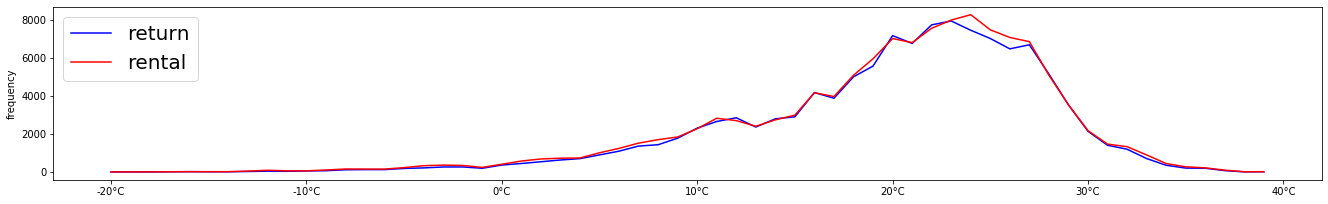

In [9]:
import matplotlib as mpl
import matplotlib.pylab as plt
t = t[t['년']!=9]
t1 = t1[t1['년']!=9]

t2= t[t['대여장소']==207].reset_index(drop = True)  
t3= t1[t1['반납장소']==207].reset_index(drop = True) 

#trr = ts[ts['대여장소']==222]

tr01 = []
for i in range(-20,40,1):
    total = 0
    for x in range(10):
        tr0=(sum((t3[t3['기온(°C)'] ==i+0.1*x])['빈도수'].tolist()))
        total = total + tr0
    tr01.append(total)
    
tr02 = []
for i in range(-20,40,1):
    total = 0
    for x in range(10):
        tr0=(sum((t2[t2['기온(°C)'] ==i+0.1*x])['빈도수'].tolist()))
        total = total + tr0
    tr02.append(total)

%matplotlib inline
#plt.title("Plot")
fig = plt.figure(figsize=(50,7))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('frequency')
ax1.set_xticklabels(['-20', '-20°C', '-10°C', '0°C', '10°C', '20°C', '30°C', '40°C'])
ax1.plot(tr01, color = "blue", label = 'return')
ax1.plot(tr02, color = "red", label = 'rental')

plt.legend(loc='upper left',fontsize = 20)
#plt.plot(dif, color = "blue")
#ax1.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
#ax1.set_yticklabels(['-20°C','-20°C','-10°C','0°C','10°C','20°C','30°C','40°C'])

plt.show()

In [57]:
from matplotlib import pyplot
import numpy
%matplotlib inline

rental = tr02
return1 = tr01
print(tr01)

label = ['-15°C~-10°C','-10°C~-5°C','-5°C~0°C','0°C~5°C','5°C~10°C','10°C~15°C','15°C~20°C','20°C~25°C','25°C~30°C','30°C~35°C','35°C~40°C']


pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 12
pyplot.rcParams["figure.figsize"] = (20, 8)

pyplot.figure()

x = numpy.arange(len(label))
font = {'size' : 12}

mpl.rc('font', **font)

pyplot.bar(x-0.15, rental, label='rental', width=0.3, color='red')
pyplot.bar(x+0.15, return1, label='return', width=0.3, color='blue')
pyplot.xticks(x, label,fontsize = 'x-large')

pyplot.legend(fontsize = 24)
pyplot.xlabel('temperature',fontsize = 'x-large')
pyplot.ylabel('frequency',fontsize = 'x-large')
#pyplot.ylim(0, 0.2)
#pyplot.title('2016년 대덕구/동구 월별 교통사고')

pyplot.savefig('ti.png')

pyplot.close()

[102, 382, 651, 1899, 6082, 12471, 21528, 37065, 28860, 5793, 479]


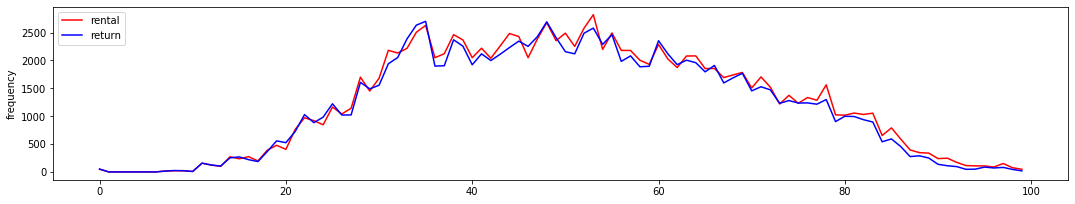

In [5]:
import matplotlib as mpl
import matplotlib.pylab as plt
t30s = pd.read_pickle('data/pickle/테스트8번.pkl')
t30r = pd.read_pickle('data/pickle/data_10_20178반납_30.pkl')

t2= t[t['대여장소']==207].reset_index(drop = True)  
t3= t1[t1['반납장소']==207].reset_index(drop = True) 
tr0 = []
for i in range(100):
    tr0.append(sum((t2[t2['습도(%)']==i])['빈도수'].tolist()))
    
tr1 = []
for i in range(100):
    tr1.append(sum((t3[t3['습도(%)']==i])['빈도수'].tolist()))

%matplotlib inline

#plt.title("Plot")
fig = plt.figure(figsize=(40,7))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('frequency')


ax1.plot(tr0, color = "red", label = 'rental')
ax1.plot(tr1, color = "blue", label = 'return')
plt.legend(loc='upper left')
#plt.plot(dif, color = "blue")
#ax1.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
#ax1.set_yticklabels(['-20°C','-20°C','-10°C','0°C','10°C','20°C','30°C','40°C'])

plt.show()

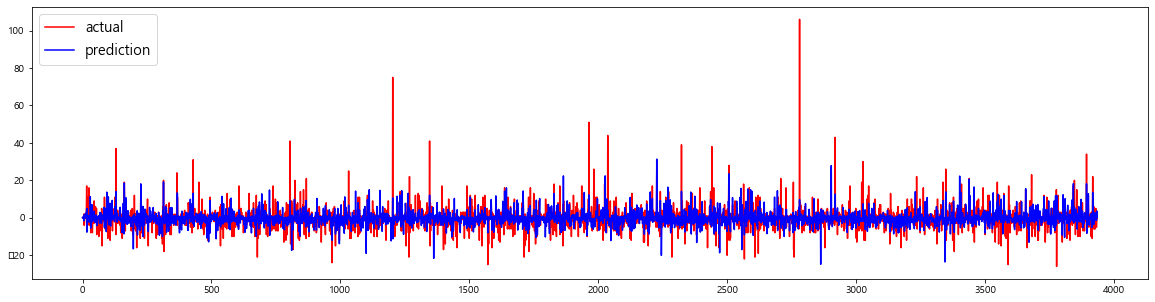

-0.12576219512195122


In [51]:
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline

#plt.title("Plot")
plt.figure(figsize=(20,5))

plt.plot(act.tolist(), color = "red",label='actual')
plt.plot(dif, color = "blue",label='prediction')
plt.legend(loc='upper left',fontsize = 'x-large')

plt.show()

avg = sum(act.tolist())/len(act.tolist())
print(avg)


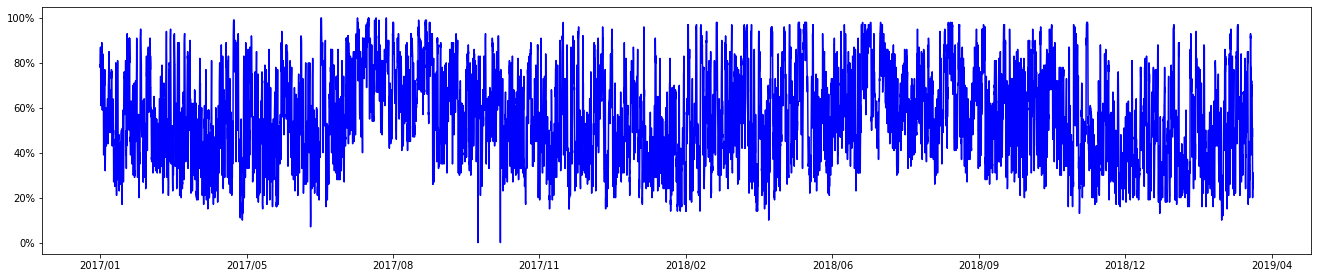

In [35]:
fig = plt.figure(figsize=(50,10))
ax1 = fig.add_subplot(2,2,1)

tr106h = tr106[tr106['시']==15]
tem = tr106['습도(%)']

ax1.plot(tem.tolist(), color = "blue")

ax1.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
ax1.set_yticklabels(['0%','0%','20%','40%','60%','80%','100%'])

plt.show()

NameError: name 'tr106' is not defined

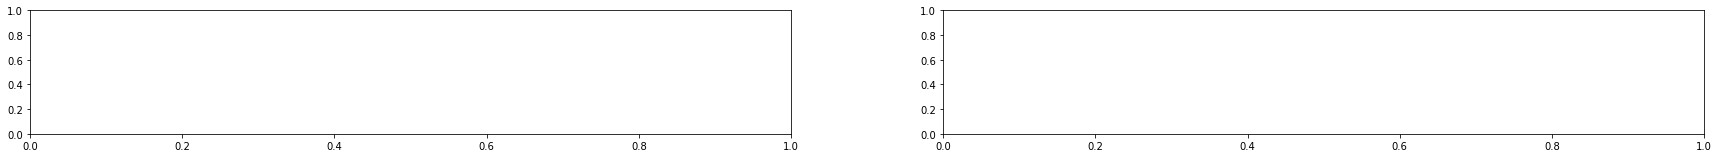

In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline

fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

tem = tr106['빈도수']
tems = ts106['빈도수']

d = (tems-tem).tolist()
ax1.plot(d, color = "green")
ax2.plot(ts106['빈도수'].tolist(), color = "blue")

ax1.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
ax1.set_ylabel('difference')
ax2.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
ax2.set_yticks([0,10,20,30,40])
ax2.set_ylabel('difference')

plt.show()

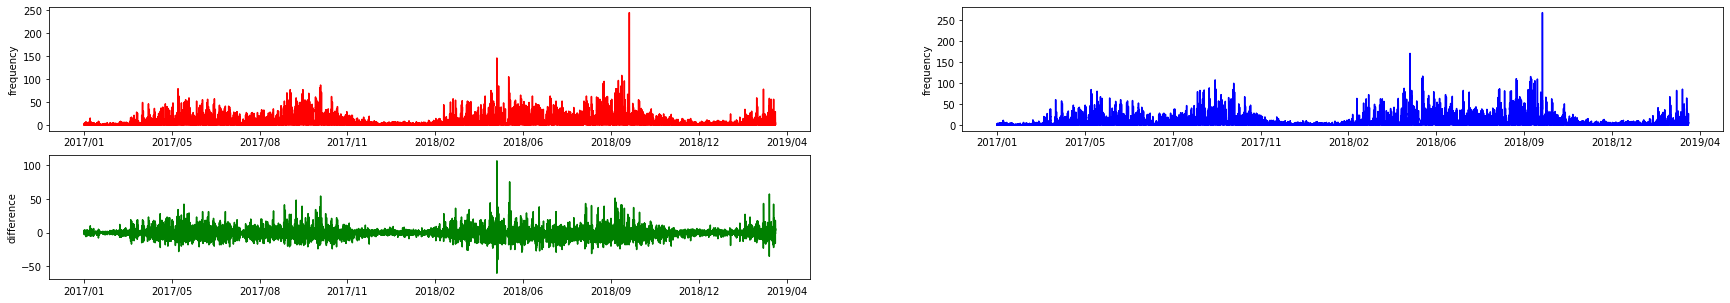

In [6]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

t2= t[t['대여장소']==207].reset_index(drop = True)
t3= t1[t1['반납장소']==207].reset_index(drop = True)

tem = t3['빈도수']
tems = t2['빈도수']

d = (tem-tems).tolist()
ax1.plot(tems.tolist(), color = "red")
ax2.plot(tem.tolist(), color = "blue")
ax3.plot(d, color = "green")

ax1.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
ax1.set_ylabel('frequency')
ax2.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
#ax2.set_yticks([0,10,20,30,40])
ax2.set_ylabel('frequency')
ax3.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
ax3.set_ylabel('difference')

plt.show()

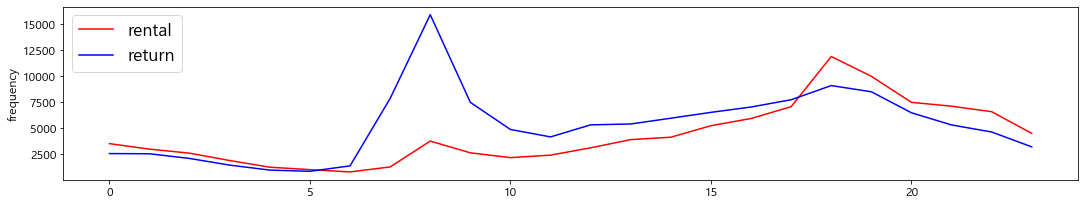

In [52]:
import matplotlib as mpl
import matplotlib.pylab as plt

t2 = t[t['대여장소']==113]
t3 = t1[t1['반납장소']==113]
tr0 = []
for i in range(24):
    tr0.append(sum((t2[t2['시']==i])['빈도수'].tolist()))
    
tr1 = []
for i in range(24):
    tr1.append(sum((t3[t3['시']==i])['빈도수'].tolist()))

%matplotlib inline
font = {'size' : 12}

mpl.rc('font', **font)
#plt.title("Plot")
fig = plt.figure(figsize=(40,7))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('frequency')


ax1.plot(tr0, color = "red", label = 'rental')
ax1.plot(tr1, color = "blue", label = 'return')
plt.legend(loc='upper left',fontsize = 'x-large')
#plt.plot(dif, color = "blue")
#ax1.set_xticklabels(['2017/01','2017/01','2017/05', '2017/08', '2017/11', '2018/02', '2018/06', '2018/09', '2018/12', '2019/04'])
#ax1.set_yticklabels(['-20°C','-20°C','-10°C','0°C','10°C','20°C','30°C','40°C'])

plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(t2[features], t2['빈도수'], test_size=0.2, random_state=15)
print(x_test)
x_train, x_test, y_train, y_test = train_test_split(t2[features], t2['빈도수'], test_size=0.01, random_state=15)
print(x_test)

       년  요일   월   시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)
11853  8   2   5  21    16.4      0.0      0.8     56     0.0
8682   7   3  12  18    -0.6      0.0      1.6     62     0.0
7547   7   5  11  11     7.0      0.0      2.5     35     0.0
10222  8   4   3  22     0.5      0.0      0.9     38     0.0
12637  8   0   6  13    23.7      0.0      1.2     49     0.0
10220  8   4   3  20     1.2      0.0      2.5     35     0.0
5284   7   2   8   4    26.0      0.1      1.0     75     0.0
8209   7   5  12   1    -4.1      0.0      0.6     49     0.0
7974   7   2  11   6     5.2      0.0      1.6     82     0.0
12904  8   4   6  16    30.8      0.0      3.8     31     0.0
16471  8   6  11   7     2.1      0.0      0.7     56     0.0
8716   7   5  12   4    -1.1      0.0      0.7     83     0.0
15540  8   2  10  19    11.3      0.0      1.1     50     0.0
13141  8   0   7  13    22.6      0.5      0.6     97     0.0
12087  8   5   5  15    23.9      0.0      1.6     37     0.0
5390   7